<a href="https://colab.research.google.com/github/MichalBalcerak/ML24-25/blob/main/Homework04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

I generate data based on linear relationship:
$$y=\beta_0+\beta_1x_1+\dots+\beta_nx_n+\epsilon
$$
where
$$\epsilon\sim\mathcal{N}(0,\sigma^2)$$
All these parameters are known (estabilished):\
I select $\sigma^2=1$, $n=50$ and only 5 $\beta_i\neq0$. My data sample size is 100.

In [9]:
np.random.seed(42)

beta = np.zeros(50)
nonzero_indices = np.random.choice(50, 5, replace=False)
beta[nonzero_indices] = np.random.randn(5)

X = np.random.unif(100, 50)
noise = np.random.normal(0, 1.0, size=100)
y = X @ beta + noise

test_X = np.random.unif(100, 50)
test_y = test_X @ beta


I implement LASSO and RIDGE regression for different $\alpha$ values. For each $\alpha$ there is 100 trials, just to calculate **MSE**, **variance** and **bias** across the trials.

In [16]:
lambdas = np.logspace(-4, 1, 100)

mse_for_lambdas_list_LASSO = []
var_for_lambdas_list_LASSO = []
bias2_for_lambdas_list_LASSO = []

for L in lambdas:
    preds = []

    for i in range(100):
        X_resampled, y_resampled = resample(X_train, y_train)

        lasso = Lasso(alpha=L, random_state=42)
        lasso.fit(X_resampled, y_resampled)
        y_pred = lasso.predict(X_test)

        preds.append(y_pred)

    preds = np.array(preds)

    mean_preds = np.mean(preds, axis=0)
    variance_preds = np.var(preds, axis=0)
    bias2 = (mean_preds - y_test.ravel()) ** 2

    mse = np.mean((preds - y_test.ravel())**2)
    mean_bias2 = np.mean(bias2)
    mean_var = np.mean(variance_preds)

    mse_for_lambdas_list_LASSO.append(mse)
    bias2_for_lambdas_list_LASSO.append(mean_bias2)
    var_for_lambdas_list_LASSO.append(mean_var)

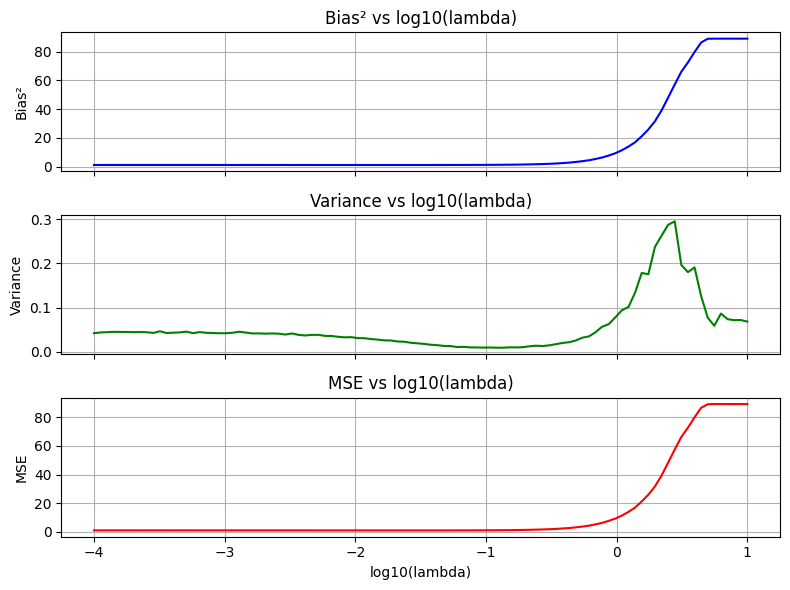

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Bias² plot
axs[0].plot(np.log10(lambdas), bias2_for_lambdas_list_LASSO, color='blue')
axs[0].set_ylabel("Bias²")
axs[0].set_title("Bias² vs log10(lambda)")
axs[0].grid(True)

# Variance plot
axs[1].plot(np.log10(lambdas), var_for_lambdas_list_LASSO, color='green')
axs[1].set_ylabel("Variance")
axs[1].set_title("Variance vs log10(lambda)")
axs[1].grid(True)

# MSE plot
axs[2].plot(np.log10(lambdas), mse_for_lambdas_list_LASSO, color='red')
axs[2].set_ylabel("MSE")
axs[2].set_xlabel("log10(lambda)")
axs[2].set_title("MSE vs log10(lambda)")
axs[2].grid(True)

plt.tight_layout()
plt.show()